# IML Assignment 1


## Name: Piniagin Maxim

## mail: m.piniagin@innopolis.university


## Task 1


### Linear Regression

#### Data reading & plotting


In [1]:
import pandas as pd

df = pd.read_csv('task1_data.csv')


In [2]:
X_train, y_train, X_test, y_test = df.X_train, df.y_train, df.X_test, df.y_test


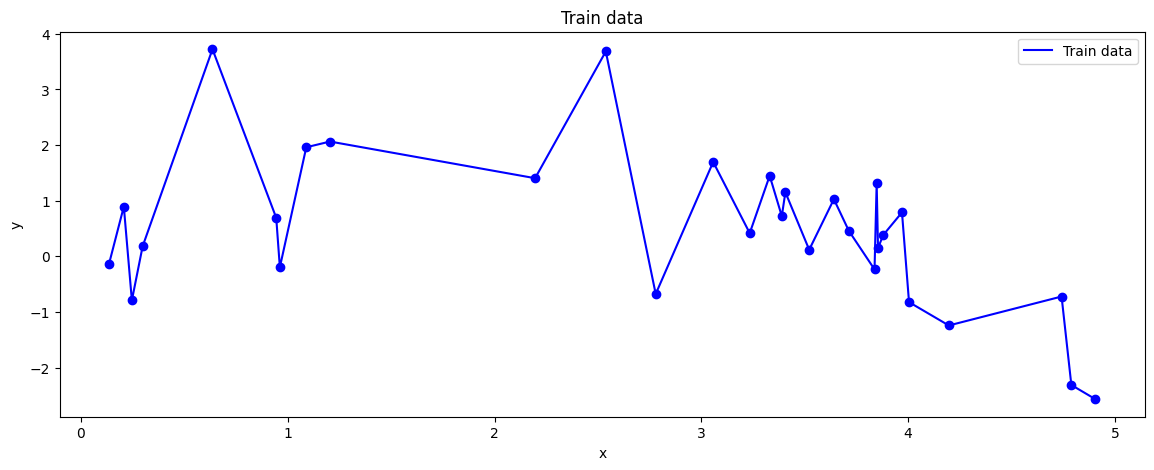

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(X_train, y_train, label="Train data", color="blue")
plt.scatter(X_train, y_train, color="blue")
plt.title("Train data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()


#### Linear regression model fitting


In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lr = regressor.predict(X_test)


#### Linear regression model prediction & Evaluation


In [5]:
from sklearn import metrics


def print_metrics(y_actual, y_pred):
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_actual, y_pred))
    print("Mean Squared Error:", metrics.mean_squared_error(y_actual, y_pred))
    print("Root Mean Squared Error:", np.sqrt(
        metrics.mean_squared_error(y_actual, y_pred)))
    print("R2 Score:", metrics.r2_score(y_actual, y_pred))
    return


In [6]:
print_metrics(y_test, y_pred_lr)


Mean Absolute Error: 0.783761030241441
Mean Squared Error: 0.78105677092199
Root Mean Squared Error: 0.8837741628504365
R2 Score: 0.2609450135378707


#### Plotting original data and prediction


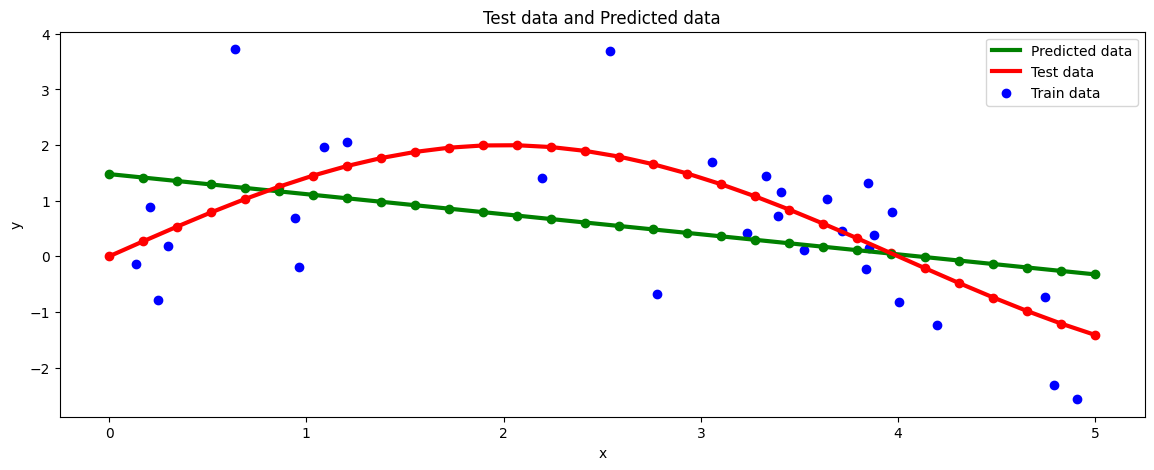

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_test, y_pred_lr, label="Predicted data", color="green", linewidth=3)
plt.plot(X_test, y_test, label="Test data", color="red", linewidth=3)
plt.scatter(X_train, y_train, label="Train data", color="blue")
plt.scatter(X_test, y_test,  color="red")
plt.scatter(X_test, y_pred_lr,  color="green")
plt.title("Test data and Predicted data")
plt.legend(loc="best")
plt.show()


#### Did the linear regression model give a good fit? Elaborate your answer


Linear regression did not give a good fit, as it is not complex enough for this task. Therefore Predicted data barely coincides with the actual test data and the error is metrics are high (over 0.7).


### Polynomial Regression

#### Constructing the polynomial regression pipeline


In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [9]:
pipeline = Pipeline([('poly', PolynomialFeatures()),
                    ('linear', LinearRegression())])


#### Tuning the degree hyper-parameter using GridSearch


In [10]:
from sklearn.model_selection import GridSearchCV
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
parameters = {'poly__degree': degrees}

search = GridSearchCV(pipeline, parameters, cv=8,
                      scoring='neg_mean_squared_error')

x = np.array(X_train).reshape(-1, 1)

search.fit(x, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=-1.078):
{'poly__degree': 2}


In [11]:
print_metrics(y_test, search.predict(X_test))


Mean Absolute Error: 0.1521327342167164
Mean Squared Error: 0.08205877217937929
Root Mean Squared Error: 0.2864590235607517
R2 Score: 0.9223539862658878


#### Manually finding the best degree


In [12]:
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for degree in degrees:
    pipeline = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                         ('linear', LinearRegression(fit_intercept=False))])
    scores = cross_val_score(pipeline, x, y_train, cv=8,
                             scoring='neg_mean_squared_error')
    print("Degree:", degree, "MSE:", scores.mean())
print("\nBest degree:", search.best_params_['poly__degree'])


Degree: 2 MSE: -1.078308479723034
Degree: 3 MSE: -1.8196891484835866
Degree: 4 MSE: -6.219075633168327
Degree: 5 MSE: -14.781989176213342
Degree: 6 MSE: -90.48103273246394
Degree: 7 MSE: -316.97725692935444
Degree: 8 MSE: -521.2964527077825
Degree: 9 MSE: -4358.357734901219
Degree: 10 MSE: -53874.21978002804

Best degree: 2


Manual search for the best degree gave the same result as the one using pipeline: best polynomial degree is 2.


#### Plotting the test data and the best degree polynomial model


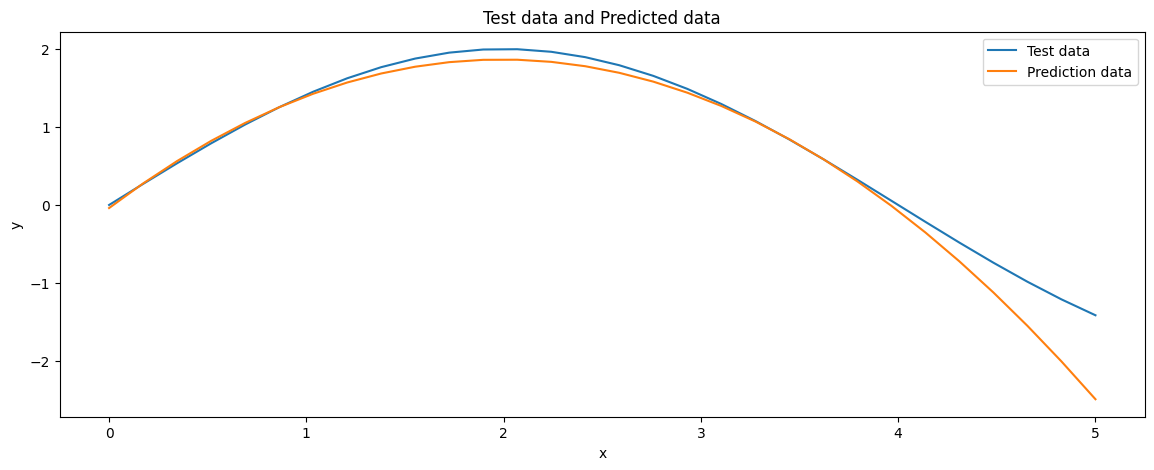

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="Test data")
plt.plot(X_test, search.predict(X_test), label="Prediction data")
plt.title("Test data and Predicted data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()


As can be seen on the graph, polynomial regression has shown more precise predictions opposed to linear one.


## Task 2


### Data processing

#### Loading the dataset


In [14]:
import pandas as pd

df = pd.read_csv('pokemon_modified.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


#### Remove the 2 redundant features


In [15]:
X = df.drop(['classification', 'name', 'is_legendary'], axis=1)
y = df['is_legendary']
# We remove this features because they both have too many variations for the model to derive any useful information.
df.nunique().sort_values(ascending=False)
# All names are unique (801 variations in 801 entries) and there are 588 variations for classification.


name                 801
classification       588
weight_kg            421
base_total           203
attack               114
speed                113
sp_attack            111
defense              109
hp                    99
sp_defense            97
height_m              51
capture_rate          33
type1                 17
base_egg_steps        10
generation             7
percentage_male        7
against_ground         6
against_poison         6
against_psychic        6
against_fight          6
experience_growth      6
against_electric       6
base_happiness         6
against_bug            5
against_dark           5
against_water          5
against_steel          5
against_rock           5
against_ice            5
against_grass          5
against_ghost          5
against_flying         5
against_fire           5
against_fairy          5
against_normal         4
against_dragon         4
is_legendary           2
dtype: int64

#### Splitting the data

random_state = 123, use stratify, test_size = 0.2


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y)


Check if the dataset is balanced or not and comment on it


In [17]:
# Dataset has about 10.4 times more non legendary pokemons than legendary ones,
#  this leads to the conclusion that it is imbalanced.
print(df.is_legendary.value_counts())
print("Ratio of non legendary to legendary pokemons: ",
      df.is_legendary.value_counts()[0]/df.is_legendary.value_counts()[1])
print("The dataset is imbalanced.")


0    731
1     70
Name: is_legendary, dtype: int64
Ratio of non legendary to legendary pokemons:  10.442857142857143
The dataset is imbalanced.


#### Exploring the dataset and checking for missing values


In [18]:
print("Total amount of missing values", pd.isnull(df).sum().sum())
print("Amount of missing values in each column (sorted in descending order):\n",
      pd.isnull(df).sum().sort_values(ascending=False))


Total amount of missing values 138
Amount of missing values in each column (sorted in descending order):
 percentage_male      98
weight_kg            20
height_m             20
against_bug           0
hp                    0
base_total            0
capture_rate          0
classification        0
defense               0
experience_growth     0
name                  0
base_egg_steps        0
type1                 0
sp_attack             0
sp_defense            0
speed                 0
generation            0
base_happiness        0
attack                0
against_dark          0
against_water         0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
is_legendary          0
dtype:

#### Impute the missing values


In [19]:
from sklearn.impute import SimpleImputer
# Imputer for numerical features
num_features = [
    col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
int_imputer = SimpleImputer(strategy='mean')
X_train[num_features] = int_imputer.fit_transform(X_train[num_features])
X_test[num_features] = int_imputer.fit_transform(X_test[num_features])

# Imputer for numerical features
cat_features = [
    col for col in X_train.columns if X_train[col].dtype == 'object']
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.fit_transform(X_test[cat_features])


#### Double check that there are no missing values


In [20]:
print("Total amount of missing values:", X_train.isnull().sum().sum())
if X_train.isnull().sum().sum() == 0:
    print("There are no more missing values in the dataset.")
else:
    print("There are still missing values in the dataset.")


Total amount of missing values: 0
There are no more missing values in the dataset.


#### Encode categorically


In [21]:
from sklearn.preprocessing import OneHotEncoder


def ohe_encode(df, feats):
    encoder = OneHotEncoder(sparse_output=False)
    encoder.fit(df[feats])
    dataframe = pd.DataFrame(encoder.transform(
        df[feats]), columns=encoder.get_feature_names_out(feats))
    dataframe = pd.concat(
        [df.reset_index(drop=True), dataframe.reset_index(drop=True)], axis=1)
    dataframe.drop(feats, axis=1, inplace=True)
    return dataframe


print("Categorical features:", cat_features)
X_train = ohe_encode(X_train, cat_features)
X_test = ohe_encode(X_test, cat_features)


Categorical features: ['type1']


We encoded categorically features using OneHotEncoder. Let's see on the example: if previously an entry had 'grass' type, now it has 1 in the type1_grass column and 0 in the rest of the type1 columns.


In [22]:
X_train


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,1.0,1.0,0.5,0.5,0.50,1.0,2.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.00,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.00,1.0,0.0,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.00,1.0,1.0,2.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,1.0,1.0,1.0,1.0,2.0,0.50,0.5,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,1.0,1.0,1.0,2.0,1.0,1.0,0.50,1.0,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,1.0,1.0,1.0,0.5,0.5,0.5,2.00,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,1.0,1.0,1.0,0.0,1.0,0.5,2.00,2.0,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data


In [23]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax.fit(X_train)
x_train_scaled = pd.DataFrame(minmax.transform(X_train))
x_train_scaled.columns = X_train.columns
x_test_scaled = pd.DataFrame(minmax.transform(X_test))
x_test_scaled.columns = X_test.columns
x_train_scaled


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix


Are there highly co-related features in the dataset? Is it a problem?


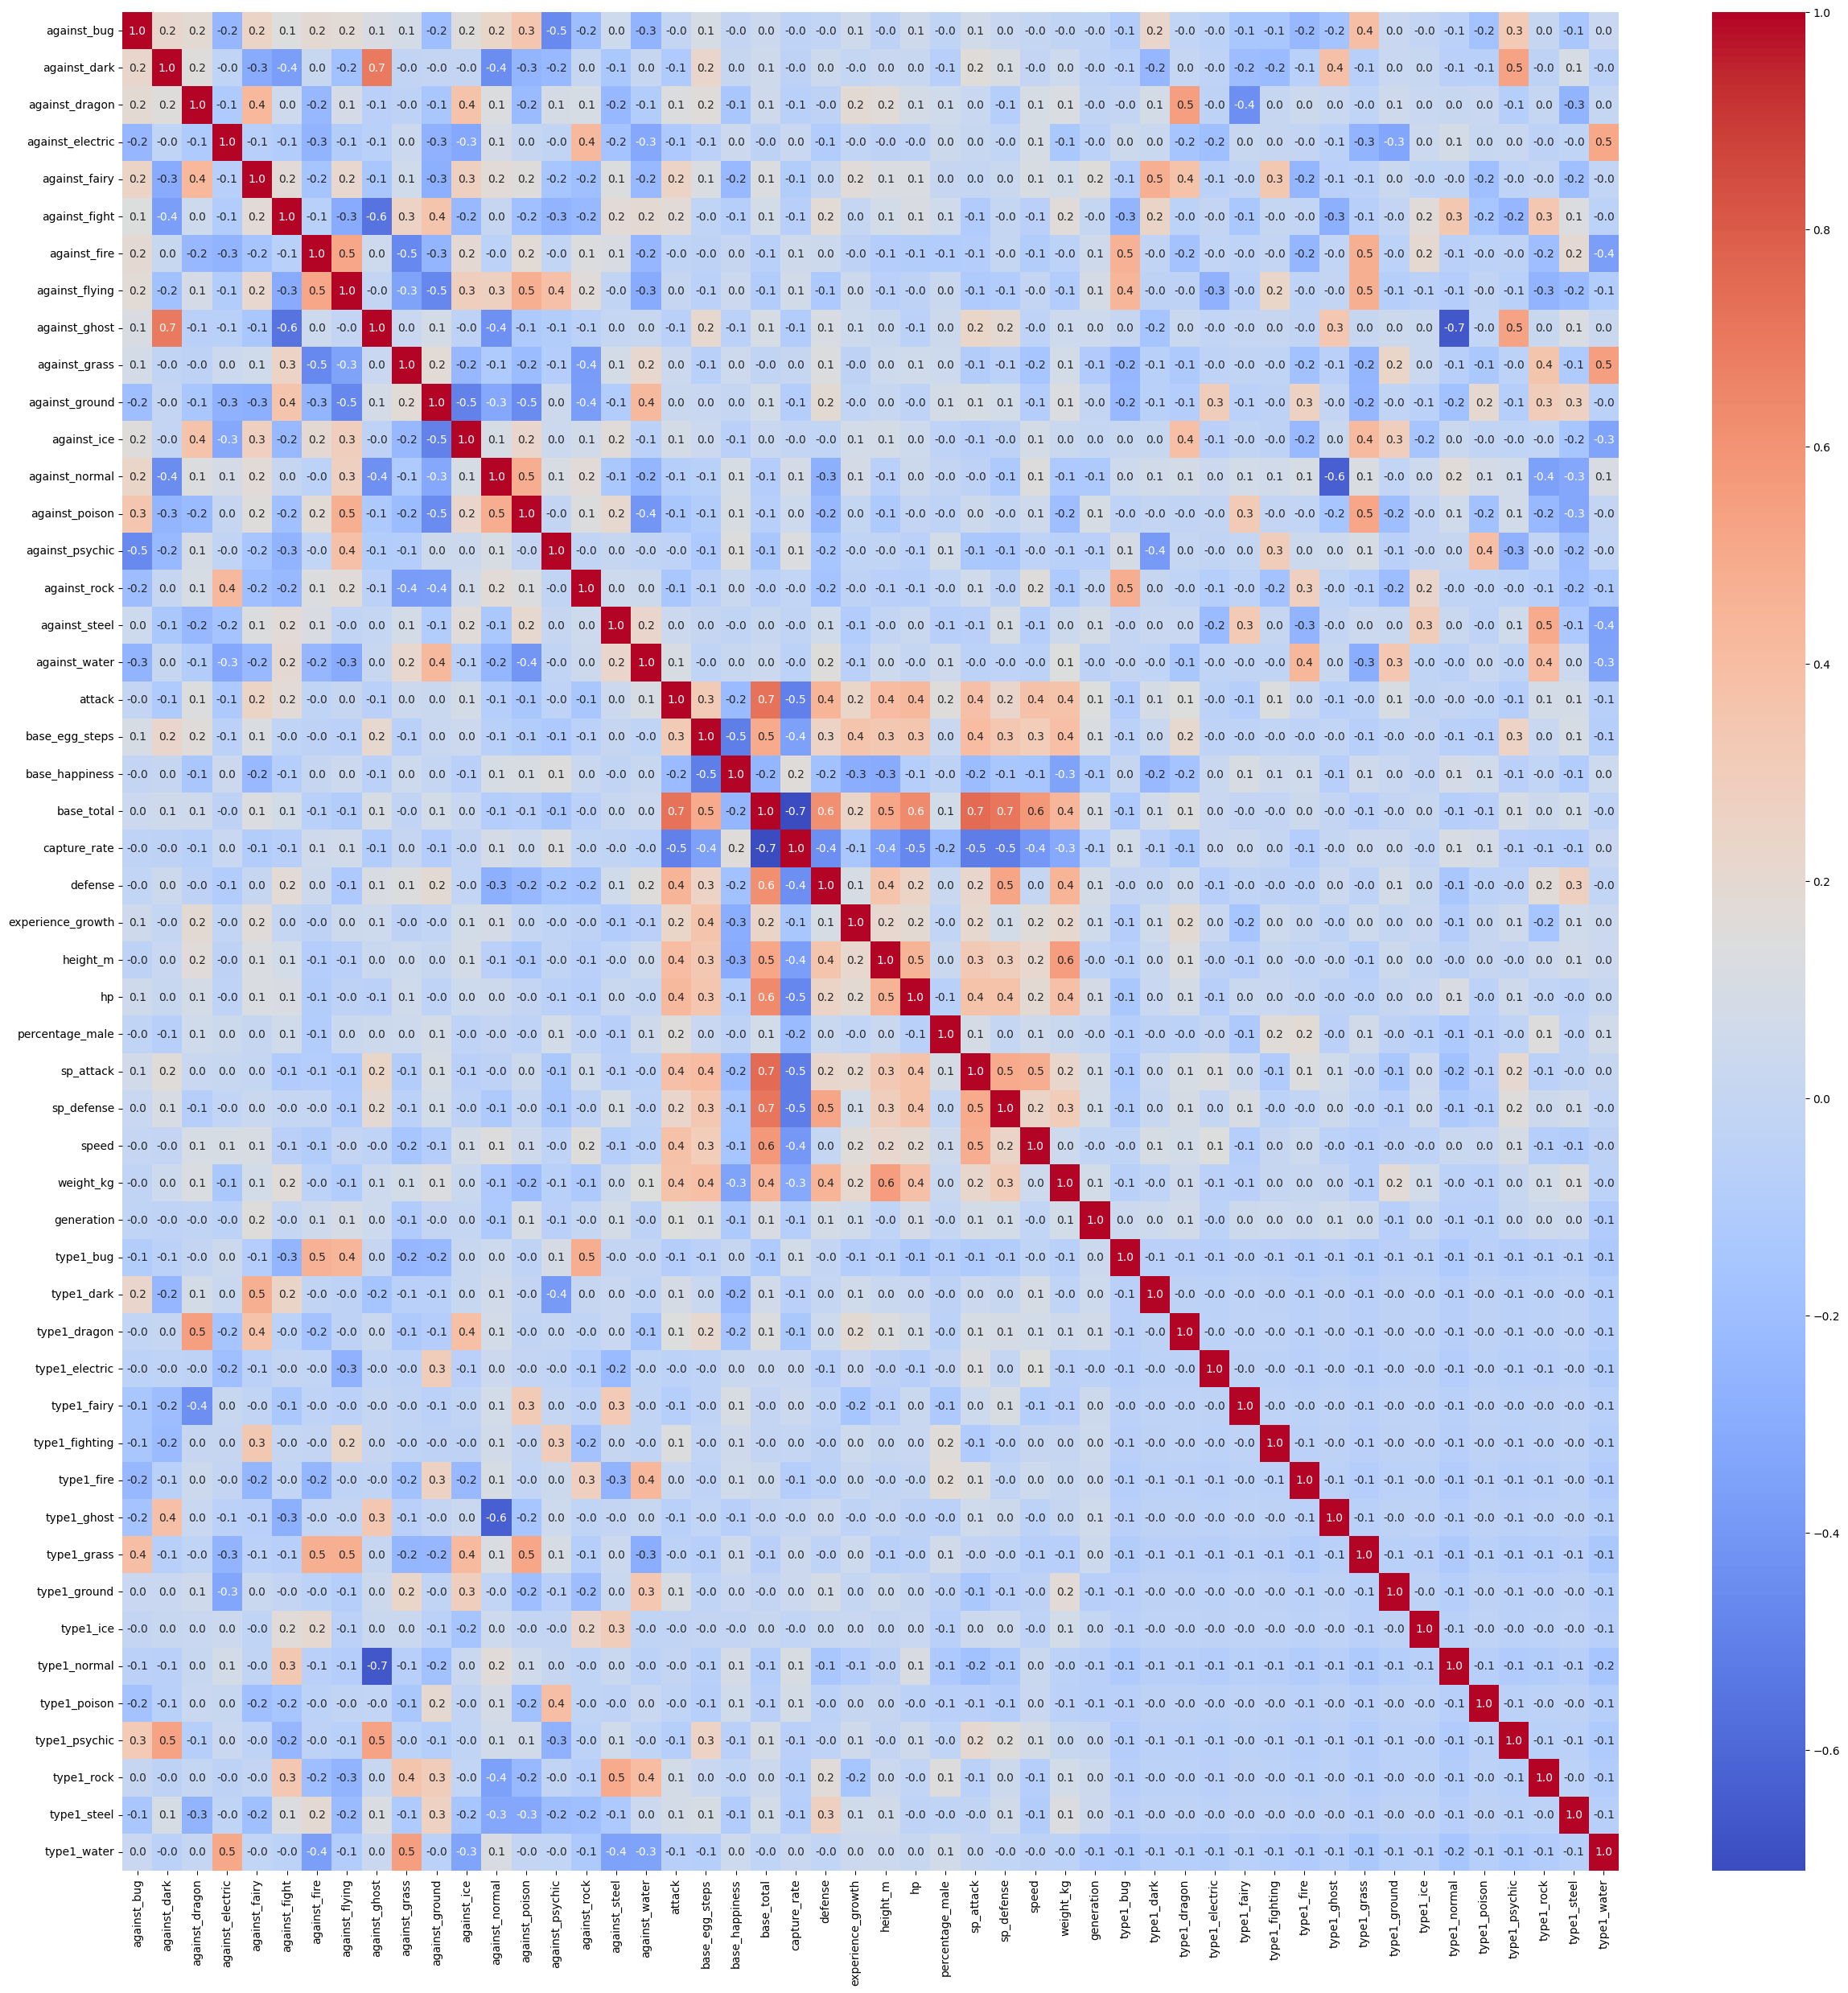

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
corr = x_train_scaled.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()


In [25]:
# Finding highly correlated features
corr_matrix = x_train_scaled.corr().abs()
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        high_corr.append(
            [corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]])
high_corr = sorted(high_corr, key=lambda x: x[2], reverse=True)
high_corr


[['sp_attack', 'base_total', 0.7485476095057604],
 ['base_total', 'attack', 0.7228499841489577],
 ['capture_rate', 'base_total', 0.7111963742816028],
 ['sp_defense', 'base_total', 0.706024701777687],
 ['against_ghost', 'against_dark', 0.6954904360531631],
 ['type1_normal', 'against_ghost', 0.6664935242574522],
 ['type1_ghost', 'against_normal', 0.634500317250238],
 ['hp', 'base_total', 0.6325653524443337],
 ['defense', 'base_total', 0.6130071796926622],
 ['speed', 'base_total', 0.5740229991344444],
 ['against_ghost', 'against_fight', 0.5564198621089028],
 ['weight_kg', 'height_m', 0.5547634370329151],
 ['type1_dragon', 'against_dragon', 0.5470442735464777],
 ['type1_water', 'against_grass', 0.545519592789182],
 ['type1_psychic', 'against_dark', 0.5282121554210444],
 ['type1_psychic', 'against_ghost', 0.5272335633203757],
 ['sp_defense', 'defense', 0.5242006152420139],
 ['sp_defense', 'capture_rate', 0.5161360813477356],
 ['sp_attack', 'capture_rate', 0.5149588305425586],
 ['against_fly

We can notice that top 4 mostly correlated pairs contain base_total, therefore we can create x_train_dropped and x_test_dropped datasets without base_total feature and compare their metrics with the ones with base_total feature and see if there is any difference.


In [26]:
x_train_dropped = x_train_scaled.drop('base_total', axis=1)
x_test_dropped = x_test_scaled.drop('base_total', axis=1)


### Model fitting and Comparison


#### Tuning LR model


In [27]:
def print_clf_metrics(y_actual, y_pred):
    print("Accuracy:", metrics.accuracy_score(y_actual, y_pred))
    print("Precision:", metrics.precision_score(y_actual, y_pred))
    print("Recall:", metrics.recall_score(y_actual, y_pred))
    print("F1 score:", metrics.f1_score(y_actual, y_pred))
    return


In [28]:
parameters = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs']
}


max_iter=1000 in LR constructor


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), parameters)


In [30]:
import warnings

# To avoid cluttering output with unimportant warnings
warnings.filterwarnings('ignore')
gs_clf.fit(x_train_dropped, y_train)


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']})

In [31]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", gs_clf.best_score_)


Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params


In [32]:
lr_clf = LogisticRegression(C=gs_clf.best_params_['C'], penalty=gs_clf.best_params_[
    'penalty'], solver=gs_clf.best_params_['solver'])


In [33]:
lr_clf.fit(x_train_scaled, y_train)
print("Metrics without dropping base_total:")
print_clf_metrics(y_test, lr_clf.predict(x_test_scaled))


Metrics without dropping base_total:
Accuracy: 0.9875776397515528
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 score: 0.9285714285714286


In [34]:
lr_clf.fit(x_train_dropped, y_train)
print("Metrics after dropping base_total:")
print_clf_metrics(y_test, lr_clf.predict(x_test_dropped))


Metrics after dropping base_total:
Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1 score: 0.9655172413793104


Since dropping base_total feature improved all metrics scores, I have decided to drop it.


In [35]:
x_test_scaled = x_test_dropped
x_train_scaled = x_train_dropped


#### Print the top 5 most influencing features and the top 5 ignored features


In [36]:
print("Top 5 most influencing:",
      x_train_scaled.columns[np.argsort(lr_clf.coef_[0])[-5:]].values)
print("Top 5 most ignored:",
      x_train_scaled.columns[np.argsort(lr_clf.coef_[0])[:5]].values)


Top 5 most influencing: ['defense' 'type1_fire' 'experience_growth' 'speed' 'base_egg_steps']
Top 5 most ignored: ['capture_rate' 'type1_normal' 'against_dragon' 'percentage_male'
 'height_m']


#### Tuning KNN model


In [37]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}
grid_search_clf = GridSearchCV(
    KNeighborsClassifier(), param_grid)
grid_search_clf.fit(x_train_scaled, y_train)
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)


Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.9484375


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [38]:
knn = KNeighborsClassifier(
    n_neighbors=grid_search_clf.best_params_['n_neighbors'],
    weights=grid_search_clf.best_params_['weights'],
    metric=grid_search_clf.best_params_['metric']
)
knn.fit(x_train_scaled, y_train)
print_clf_metrics(y_test, knn.predict(x_test_scaled))


Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7142857142857143
F1 score: 0.8333333333333333


#### Fitting GNB to the data and evaluating on the test dataset


In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)
print_clf_metrics(y_test, gnb.predict(x_test_scaled))


Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1 score: 0.717948717948718


#### Which metric is most appropriate for this task and why?


The most appropriate metric for this task is F1 score because it depends on both precision and recall. In this case, we need to have a good balance between them, as we want to avoid both false positives and false negatives.


#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.

What is the best model for this task? and based on what
did you pick it?


First lets look at the metrics for each model:

Logistic Regression:
Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1 score: 0.9655172413793104

KNN:
Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7142857142857143
F1 score: 0.8333333333333333

Gaussian Naive Bayes:
Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1 score: 0.717948717948718

As mentioned before, F1 score is the most appropriate metric for this task, as it depends on both precision and recall. Therefore, the best model for this task is Logistic Regression, as it has the highest F1 score and highest Accuracy. KNN has lower F1 score, but it has the highest precision. Gaussian Naive Bayes has the lowest F1 score, but it has rexcall equal to 1.0, which is the same as in Logistic Regression.


## Bonus Task


#### Loading the Dataset


In [40]:
import pandas as pd

train_data = pd.read_csv('bonus_train.csv')
test_data = pd.read_csv('bonus_test.csv')
train_data.head()


,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0


In [41]:
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']
print(X_train, y_train, X_test, y_test)


          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

#### Plot the data using the pairplot in sns


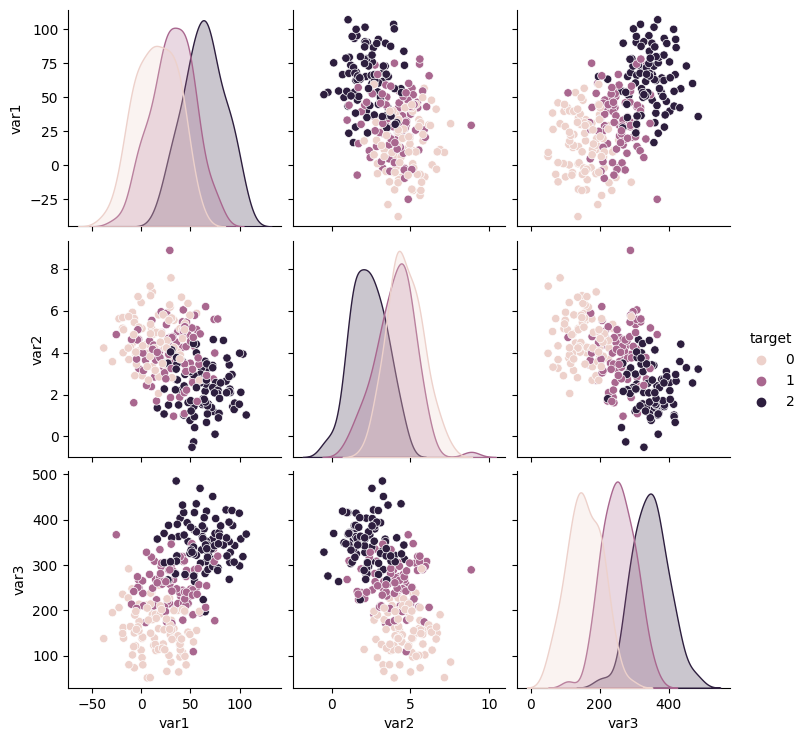

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data, hue='target', kind='scatter')
plt.show()


#### Fit LR to the training dataset using OVR and evaluate on the test dataset


In [43]:
multi_lr = LogisticRegression(multi_class='ovr', solver='newton-cg')
multi_lr.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', solver='newton-cg')

In [44]:
print("Average accuracy: ", multi_lr.score(X_test, y_test))
print("Precision for each class: ", multi_lr.score(
    X_test, y_test, sample_weight=None))
print("Recall for each class: ", multi_lr.score(
    X_test, y_test, sample_weight=None))
print("F1 score for each class: ", multi_lr.score(
    X_test, y_test, sample_weight=None))


Average accuracy:  0.8
Precision for each class:  0.8
Recall for each class:  0.8
F1 score for each class:  0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [45]:
multi_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
multi_lr.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [46]:
print("Mean accuracy: ", multi_lr.score(X_test, y_test))
print("Mean precision: ", multi_lr.score(X_test, y_test, sample_weight=None))
print("Mean recall: ", multi_lr.score(X_test, y_test, sample_weight=None))
print("Mean F1 score: ", multi_lr.score(X_test, y_test, sample_weight=None))


Mean accuracy:  0.9
Mean precision:  0.9
Mean recall:  0.9
Mean F1 score:  0.9


#### Using gridsearch to tune the C value and multi class


In [47]:
params = {
    'C': np.logspace(-10, 10, 7),
    'multi_class': ['multinomial', 'ovr']
}


In [48]:
grid_search_clf = GridSearchCV(LogisticRegression(solver='newton-cg'), params)
grid_search_clf.fit(X_train, y_train)
warnings.filterwarnings('ignore')


In [49]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)


Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


In [50]:
grid_search_clf.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']})

#### Comment on why one multi_class technique was better than the other


Multinomial method is better than OVR method, because it is more accurate. It has higher accuracy, precision, recall and F1 score.


#### Create LR with the best params


In [51]:
multi_lr = LogisticRegression(
    C=float(grid_search_clf.best_params_['C']),
    multi_class=grid_search_clf.best_params_['multi_class']
)


#### Visualize the decision boundaries


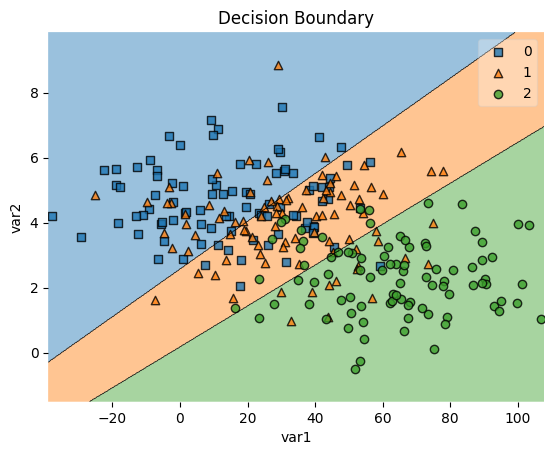

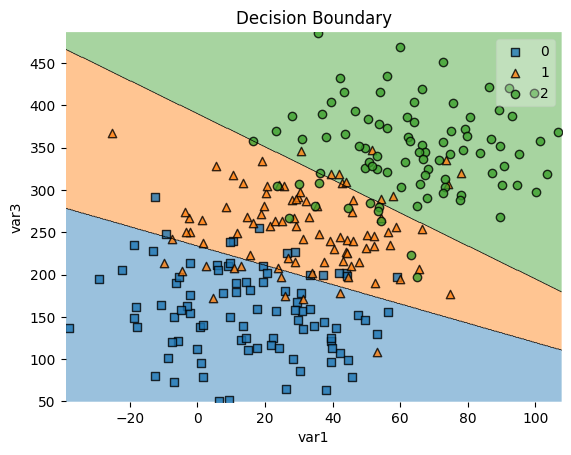

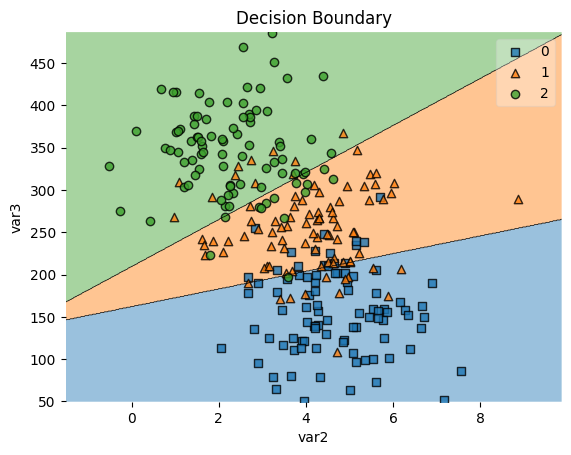

In [52]:
from mlxtend.plotting import plot_decision_regions

for i in range(0, 3):
    col1=X_train.columns[i]
    for j in range(i+1, 3):
        col2=X_train.columns[j]
        multi_lr.fit(X_train[[col1, col2]], y_train)
        plot_decision_regions(X_train[[col1, col2]].values, y_train.values, clf=multi_lr)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title('Decision Boundary')
        plt.show()


#### Comment on the decision boundary, do you think this is a good model or not? and based on what?


Multinomial shown 0.1 increase across all metric scores compared to OVR, therefore it is better than OVR. I think it is a good model, as it has pretty high metrics scores (0.9+).
